In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# Data Understanding

df = pd.read_csv('C:\\Users\\yadav\\Downloads\\Jupyter\\Datasets\\penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [7]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [8]:
df['culmen_length_mm'].mean()

43.9219298245614

In [9]:
df['culmen_length_mm'].max()

59.6

In [10]:
df[df['sex']=='Male']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [11]:
df.groupby('sex')['body_mass_g'].max()

sex
.         4875.0
FEMALE    5200.0
MALE      6300.0
Name: body_mass_g, dtype: float64

In [12]:
df['sex'].replace('Male','MALE',inplace=True)

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [14]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
#Data preprocessing
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
continuous=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g ']
discrete=['species','island','sex']

In [18]:
df[discrete].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  344 non-null    object
 1   island   344 non-null    object
 2   sex      344 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [19]:
df.duplicated().sum()

0

***Encoding***

In [20]:
inp=df.drop('species', axis=1)
inp

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...
339,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [21]:
pd.get_dummies(inp, drop_first=True).astype(int)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39,18,181,3750,0,1,0,1
1,39,17,186,3800,0,1,1,0
2,40,18,195,3250,0,1,1,0
3,43,17,200,4201,0,1,0,1
4,36,19,193,3450,0,1,1,0
...,...,...,...,...,...,...,...,...
339,43,17,200,4201,0,0,0,1
340,46,14,215,4850,0,0,1,0
341,50,15,222,5750,0,0,0,1
342,45,14,212,5200,0,0,1,0


***X & y***

In [22]:
X=pd.get_dummies(inp, drop_first=True)
y=df['species']

In [23]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,True,False,True
1,39.50000,17.40000,186.000000,3800.000000,False,True,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,True,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,True,False,True
4,36.70000,19.30000,193.000000,3450.000000,False,True,True,False
...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,False,False,False,True
340,46.80000,14.30000,215.000000,4850.000000,False,False,True,False
341,50.40000,15.70000,222.000000,5750.000000,False,False,False,True
342,45.20000,14.80000,212.000000,5200.000000,False,False,True,False


***Train test split***

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [25]:
X_train.shape

(275, 8)

In [26]:
y_train.value_counts()

species
Adelie       122
Gentoo       103
Chinstrap     50
Name: count, dtype: int64

# Modelling

***Default decision tree***

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=0) 
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
# train accuracy
ypred_train=dt_default.predict(X_train)
from sklearn.metrics import accuracy_score
print('Train accuracy : ', accuracy_score(y_train, ypred_train))

# cross validation score
from sklearn.model_selection import cross_val_score
print('cross validation score : ', cross_val_score(dt_default, X_train, y_train, cv=5).mean())

# test predict
ypred_test=dt_default.predict(X_test)
from sklearn.metrics import accuracy_score
print('Test accuracy : ', accuracy_score(y_test, ypred_test))

Train accuracy :  1.0
cross validation score :  0.9563636363636363
Test accuracy :  1.0


In [29]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

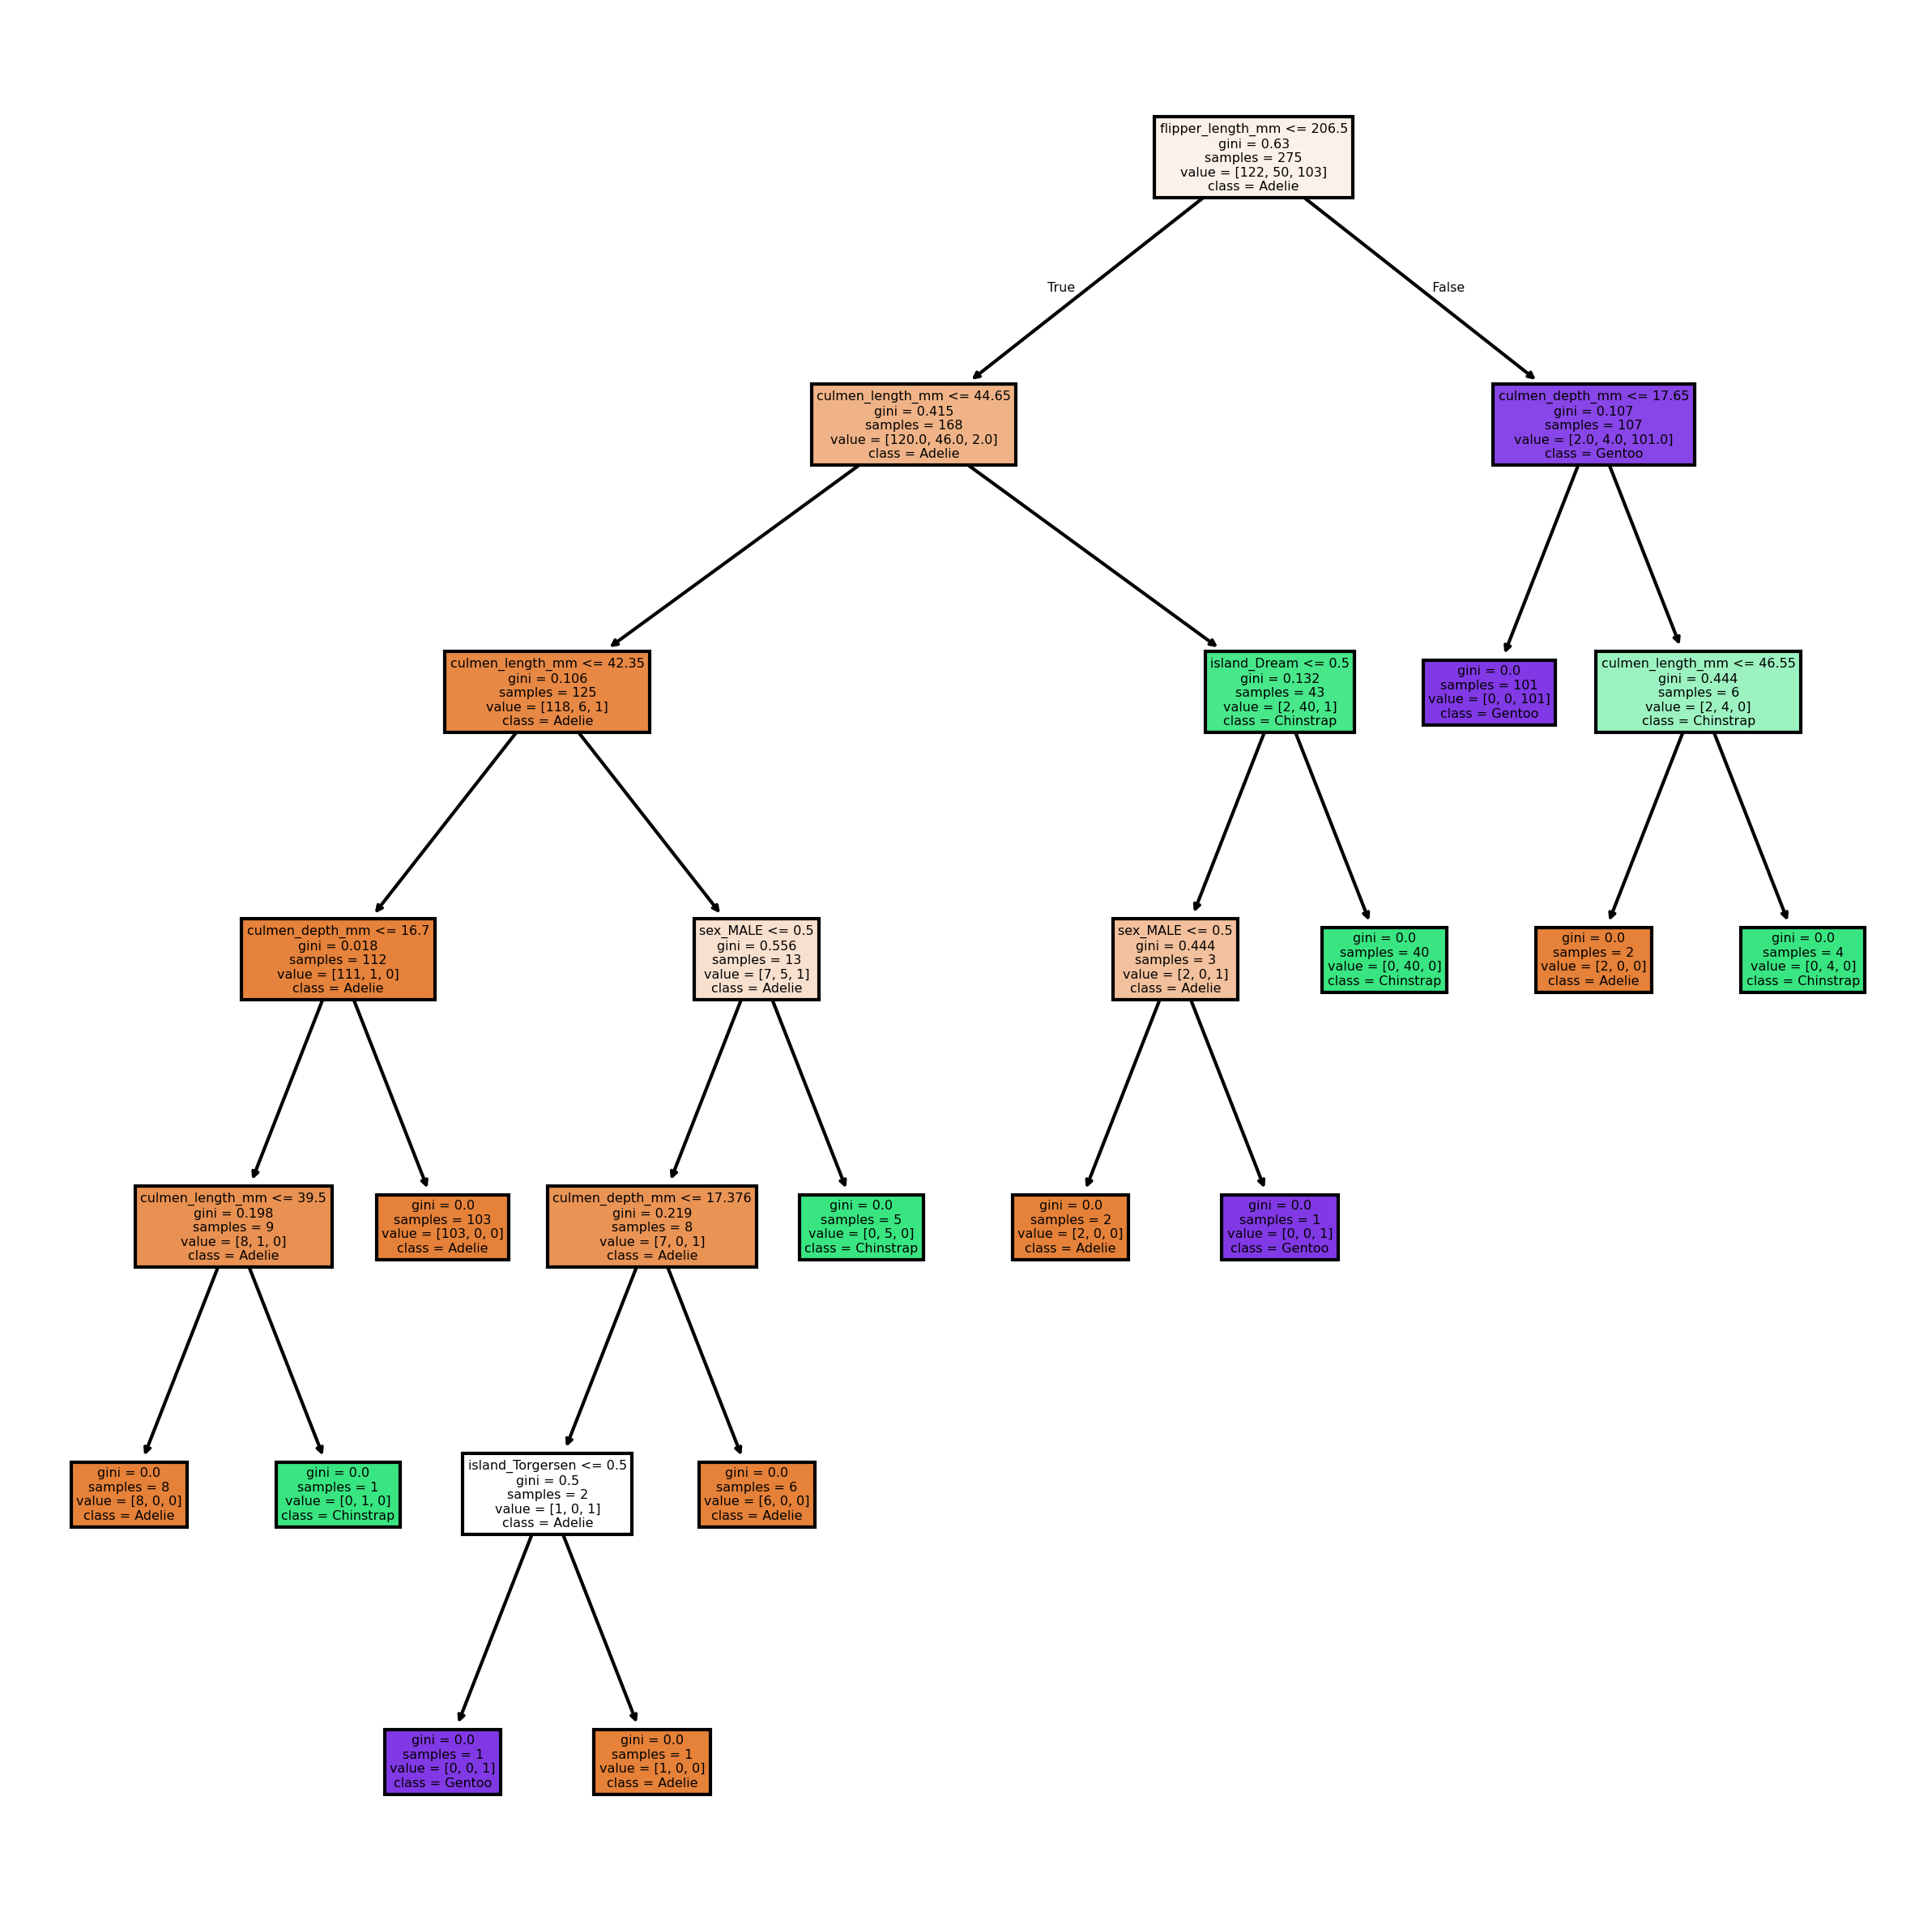

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10), dpi=300)

plot_tree(dt_default, filled=True, 
          feature_names=['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g','island_Dream','island_Torgersen', 'sex_MALE'],
         class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

***If any overfitting problem is there, do pruning using GridSearchCV***

In [31]:
#model
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=0)

#parameters which you want to tune 
param_grid={'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5,6]}

# GridSearchCV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [32]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=0)

***After creating decision tree model, we can identify important features***

In [33]:
grid.best_estimator_.feature_importances_

array([0.34390987, 0.06444366, 0.5346114 , 0.        , 0.02520849,
       0.        , 0.03182658, 0.        ])

In [34]:
s1=pd.DataFrame(grid.best_estimator_.feature_importances_, columns=['feature'], index=X_train.columns.tolist())
s1

,feature
culmen_length_mm,0.343910
culmen_depth_mm,0.064444
flipper_length_mm,0.534611
body_mass_g,0.000000
island_Dream,0.025208
island_Torgersen,0.000000
sex_FEMALE,0.031827
sex_MALE,0.000000


In [35]:
# filter out important features
important_features = s1[s1['feature']>0].index.tolist()
important_features

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'island_Dream',
 'sex_FEMALE']

# Best Model after hyperparameter tuning, pruning, and unnecessary variable removal

In [36]:
X_imp=X[important_features]
y=df['species']

from sklearn.model_selection import train_test_split
X_imp_train, X_imp_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

from sklearn.tree import DecisionTreeClassifier
dt_best_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state=0) 
dt_best_model.fit(X_imp_train, y_train)

# train accuracy
ypred_train=dt_best_model.predict(X_imp_train)
from sklearn.metrics import accuracy_score
print('Train accuracy : ', accuracy_score(y_train, ypred_train))

# cross validation score
from sklearn.model_selection import cross_val_score
print('cross validation score : ', cross_val_score(dt_best_model, X_imp_train, y_train, cv=5).mean())

# test predict
ypred_test=dt_best_model.predict(X_imp_test)
from sklearn.metrics import accuracy_score
print('Test accuracy : ', accuracy_score(y_test, ypred_test))

Train accuracy :  0.9963636363636363
cross validation score :  0.96
Test accuracy :  1.0


In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)

In [38]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



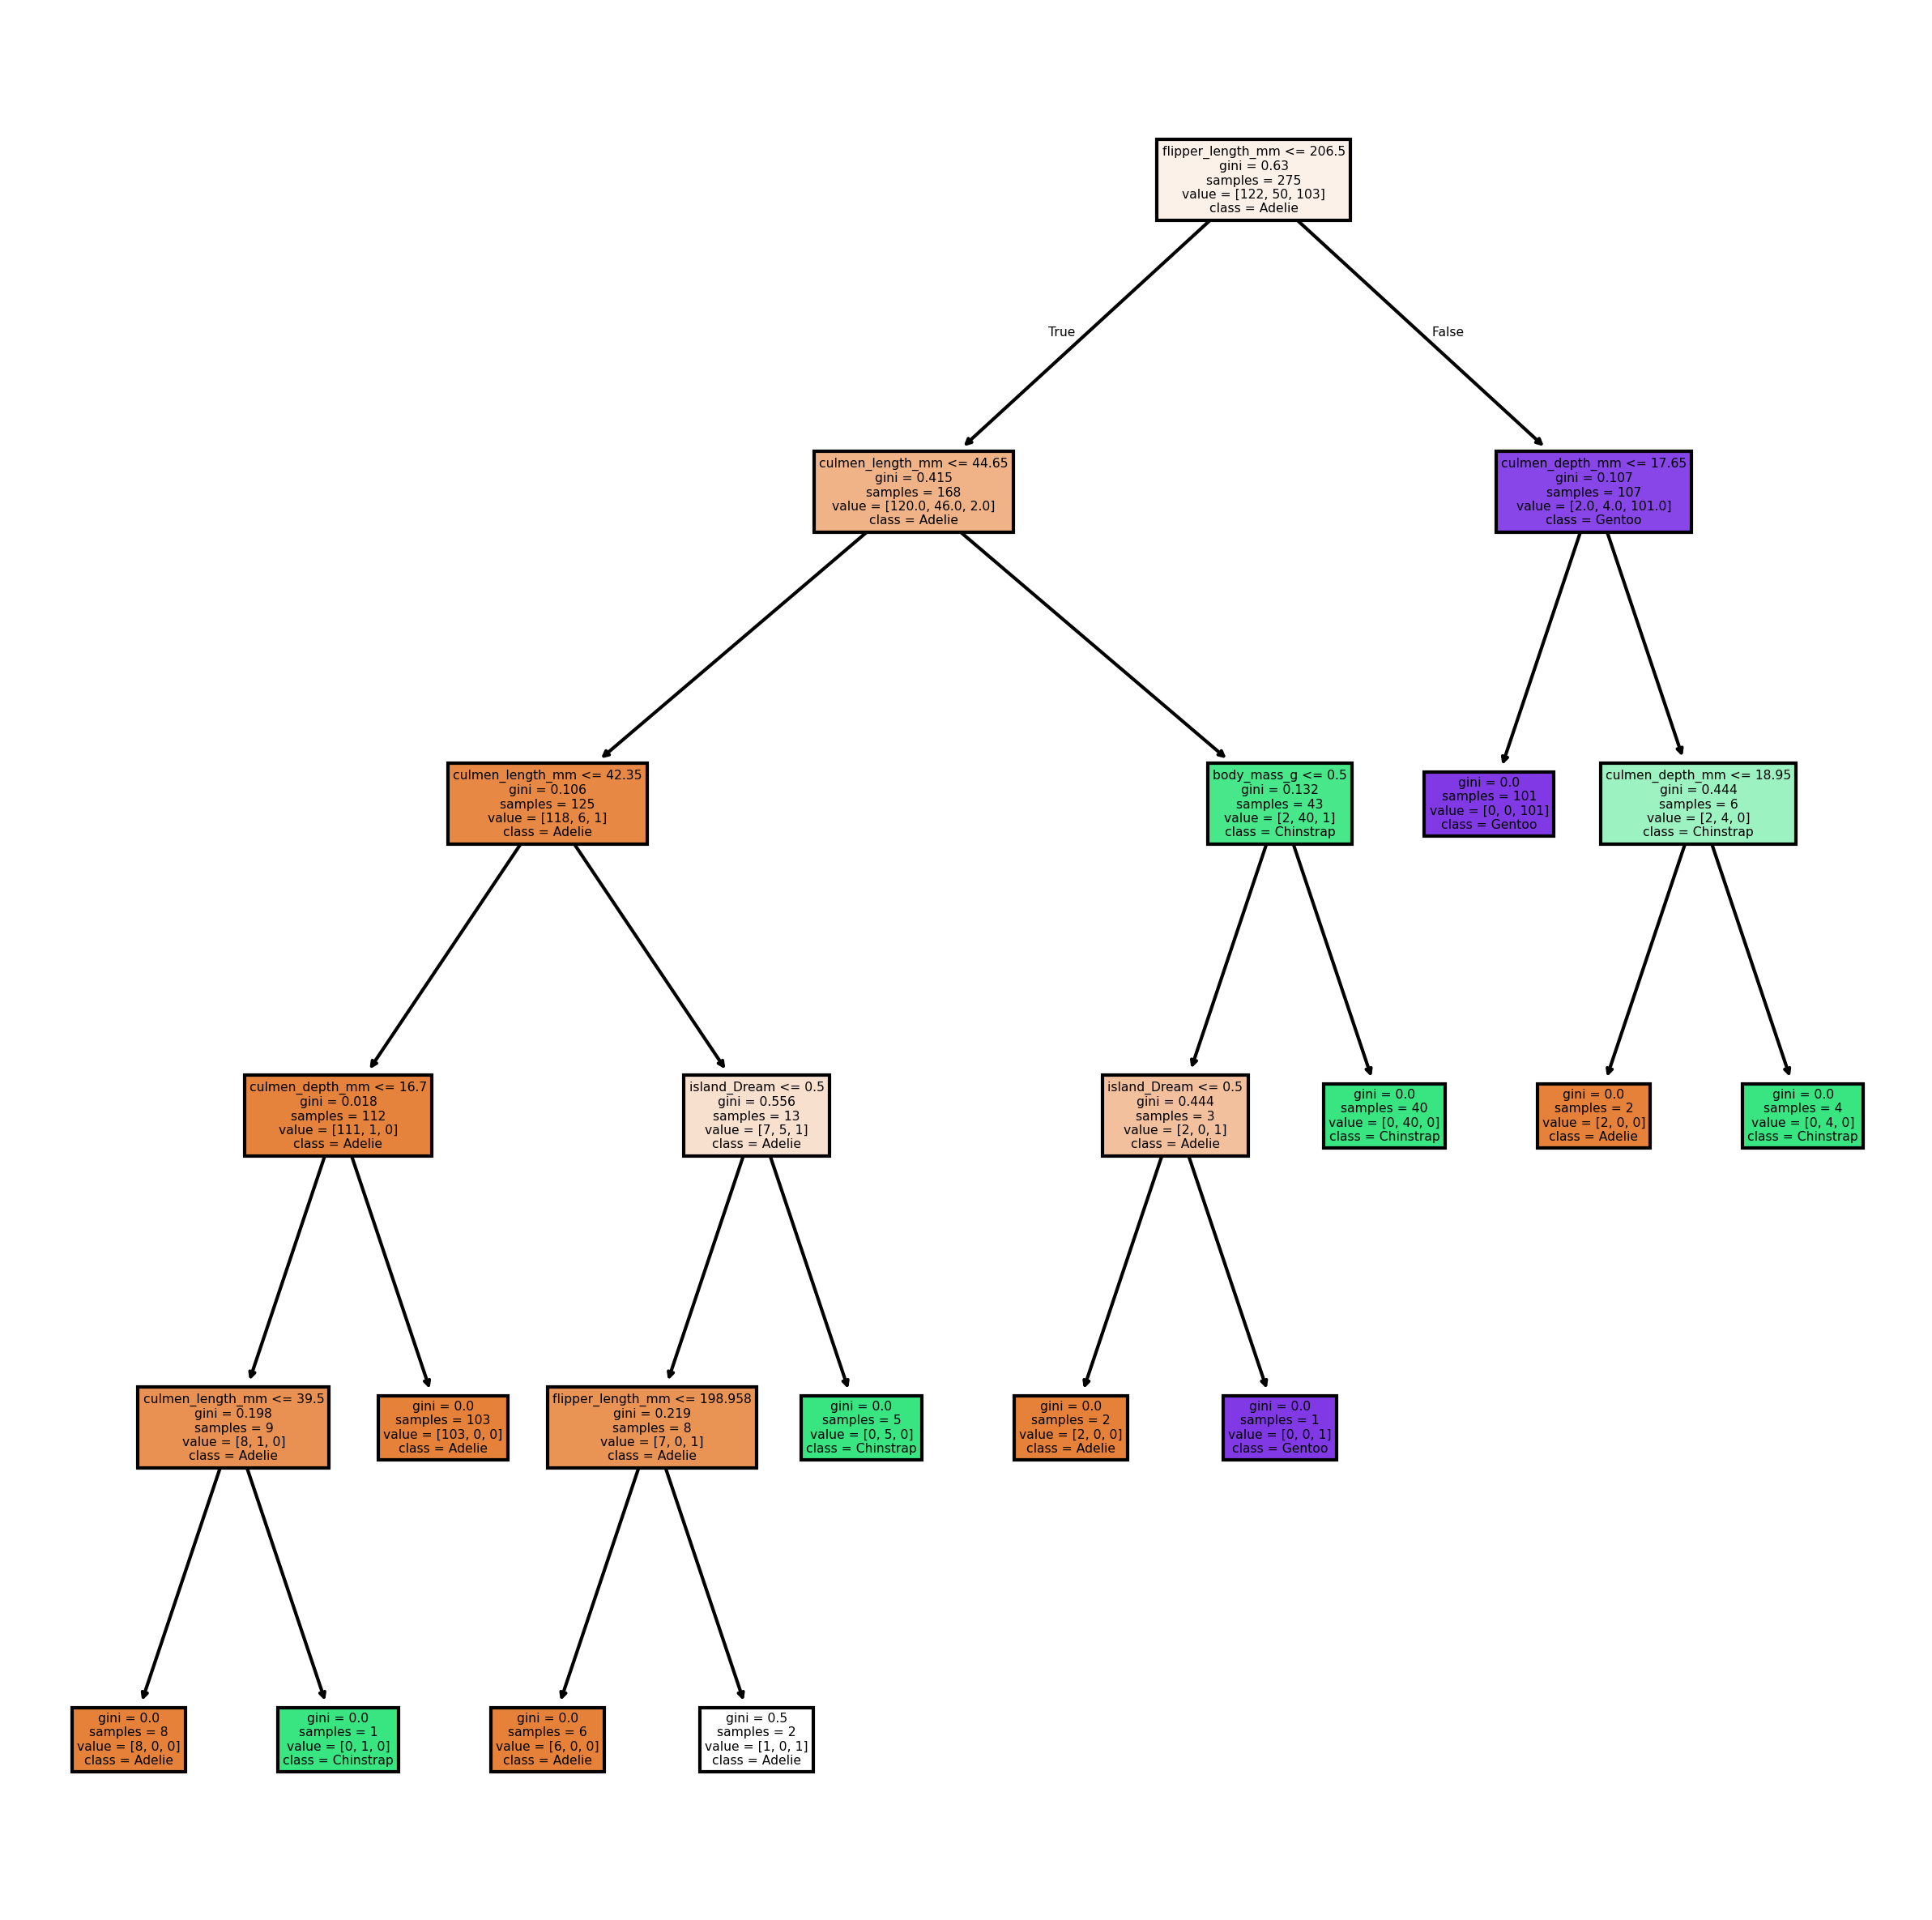

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10), dpi=300)

plot_tree(dt_best_model, filled=True, 
          feature_names=['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g','island_Dream','island_Torgersen', 'sex_MALE'],
         class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()